# Bitcoin and Google Trends

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import datetime
from sklearn.model_selection import train_test_split

In [39]:
# Bitcoin and Google datasets are loaded
googledata = pd.read_csv('./../data/Google Trends/Trends_replace.csv')
googledata

,date,Scaled Value,Bitcoin trend
0,2021-12-24 00:00:00,79.000000,21.180458
1,2021-12-24 01:00:00,83.000000,22.252886
2,2021-12-24 02:00:00,81.000000,21.716672
3,2021-12-24 03:00:00,84.000000,22.520993
4,2021-12-24 04:00:00,77.000000,20.644244
...,...,...,...
4532,2022-06-30 20:00:00,127.117432,34.081081
4533,2022-06-30 21:00:00,129.738410,34.783784
4534,2022-06-30 22:00:00,131.048899,35.135135
4535,2022-06-30 23:00:00,111.391564,29.864865


In [40]:
googledata['date']= pd.to_datetime(googledata['date'])

In [41]:
type(googledata['date'])

pandas.core.series.Series

In [42]:
sub_google_data=googledata[googledata['date'].dt.month==1]
sub_google_data.set_index('date',inplace=True)

In [43]:
dateparser=lambda x: pd.datetime.strptime(x, '%d/%m/%Y %H:%M')
bitcoin=pd.read_csv("./../data/Price/Processed_BTCUSDT/New_BTCUSDT-1h-2022-01.csv", index_col="Open time", date_parser=dateparser)
bitcoin.head(10)

/var/folders/vp/8_rd4_c56g3dpqb1167z6tqr0000gn/T/ipykernel_3492/65033733.py:1: FutureWarning:

The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.



,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
Open time,,,,,,,,,,,
2022-01-01 00:00:00,46210.57,46729.73,46210.55,46650.01,8957.465,01/01/2022 00:59,416444814.3,91267,4777.701,2.221296e+08,0
2022-01-01 01:00:00,46650.00,46944.56,46570.34,46766.78,7276.249,01/01/2022 01:59,340380570.8,73308,3689.837,1.726189e+08,0
2022-01-01 02:00:00,46767.44,46917.87,46709.44,46796.14,4478.713,01/01/2022 02:59,209685983.3,46403,2103.345,9.848722e+07,0
2022-01-01 03:00:00,46796.15,46888.00,46746.32,46789.56,4208.992,01/01/2022 03:59,197079681.7,39070,1928.027,9.028410e+07,0
2022-01-01 04:00:00,46789.55,46868.74,46605.00,46690.81,6149.298,01/01/2022 04:59,287229210.7,63606,2855.818,1.334055e+08,0
2022-01-01 05:00:00,46690.81,47566.66,46657.99,47184.18,14988.008,01/01/2022 05:59,708047313.2,143532,8193.570,3.869317e+08,0
2022-01-01 06:00:00,47184.19,47314.40,46914.84,46972.19,7474.840,01/01/2022 06:59,352269561.1,67979,3343.354,1.576009e+08,0
2022-01-01 07:00:00,46972.19,47247.44,46867.00,47186.83,6227.873,01/01/2022 07:59,292936111.0,61729,3478.601,1.636773e+08,0
2022-01-01 08:00:00,47186.83,47338.00,47060.74,47117.84,6294.515,01/01/2022 08:59,297052698.4,63154,3149.875,1.486699e+08,0


In [44]:
bitcoindata=pd.concat([bitcoin,sub_google_data], axis=1)

In [45]:
bitcoindata.rename(columns={'Bitcoin trend':'Google_Trends'}, inplace=True)

# EDA

In [46]:
# keep the useful columns
columns_keep=['Open','High','Low','Close','Volume','Google_Trends']
columns=list(bitcoindata.columns.values)
print(columns)
for i in columns_keep:
    columns.remove(i)

bitcoin_new=bitcoindata.drop(columns=columns)

['Open', 'High', 'Low', 'Close', 'Volume', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore', 'Scaled Value', 'Google_Trends']


In [47]:
bitcoin_new

,Open,High,Low,Close,Volume,Google_Trends
2022-01-01 00:00:00,46210.57,46729.73,46210.55,46650.01,8957.465,19.839923
2022-01-01 01:00:00,46650.00,46944.56,46570.34,46766.78,7276.249,21.224103
2022-01-01 02:00:00,46767.44,46917.87,46709.44,46796.14,4478.713,20.762710
2022-01-01 03:00:00,46796.15,46888.00,46746.32,46789.56,4208.992,16.610168
2022-01-01 04:00:00,46789.55,46868.74,46605.00,46690.81,6149.298,17.532955
...,...,...,...,...,...,...
2022-01-31 19:00:00,38446.44,38741.73,38358.64,38400.00,16995.608,25.351936
2022-01-31 20:00:00,38400.01,38552.99,38220.00,38432.32,12091.364,28.687717
2022-01-31 21:00:00,38432.32,38512.93,38314.42,38395.17,5858.826,30.022029
2022-01-31 22:00:00,38395.17,38725.60,38377.19,38385.61,8523.666,27.686982


[Multiple Axes](https://plotly.com/python/multiple-axes/)

In [48]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from itertools import cycle

In [49]:
def plot_chart(x,y1,y2,name1,name2,axes1,axes2):
    # plot the data of the google trends and Bitcoin
    fig = make_subplots(specs=[[{"secondary_y": True}]])
    fig.add_trace(go.Scatter(x=x,
                             y=y1,
                             mode='lines',
                             name=name1), secondary_y=False)
    fig.add_trace(go.Scatter(x=x,
                             y=y2,
                             mode='lines',
                             name=name2), secondary_y=True)
    # Add axis titles
    fig.update_layout(
        title_text="Bitcoin and Google Trends",
        width=800,
        height=600,
    )

    fig.update_xaxes(title_text="Datetime")

    # Set y-axes titles
    fig.update_yaxes(title_text=axes1, secondary_y=False)
    fig.update_yaxes(title_text=axes2, secondary_y=True)
    fig.show()

In [50]:
x= bitcoin_new.index
y1=bitcoin_new['Close']
y2=bitcoin_new['Google_Trends']
name1="Bitcoin Price"
name2="Google Trends"
axes1= "Bitcoin Price"
axes2="Google Trends"
plot_chart(x, y1, y2, name1, name2, axes1, axes2)

## Calculate returns

change to stationary

In [51]:
def stationary(array):
    log_diff=np.log(array).diff()
    return pd.DataFrame(log_diff[1:])

In [52]:
bitcoin_hourly_return=stationary(bitcoin_new['Close'])
trends_hourly_return=stationary(bitcoin_new['Google_Trends'])

In [53]:
bitcoin_hourly_return

,Close
2022-01-01 01:00:00,0.002500
2022-01-01 02:00:00,0.000628
2022-01-01 03:00:00,-0.000141
2022-01-01 04:00:00,-0.002113
2022-01-01 05:00:00,0.010511
...,...
2022-01-31 19:00:00,-0.001208
2022-01-31 20:00:00,0.000841
2022-01-31 21:00:00,-0.000967
2022-01-31 22:00:00,-0.000249


In [54]:
trends_hourly_return

,Google_Trends
2022-01-01 01:00:00,0.067441
2022-01-01 02:00:00,-0.021979
2022-01-01 03:00:00,-0.223144
2022-01-01 04:00:00,0.054067
2022-01-01 05:00:00,-0.141079
...,...
2022-01-31 19:00:00,-0.051293
2022-01-31 20:00:00,0.123614
2022-01-31 21:00:00,0.045462
2022-01-31 22:00:00,-0.080969


In [55]:
x= bitcoin_hourly_return.index
y1=bitcoin_hourly_return['Close']
y2=trends_hourly_return['Google_Trends']
name1="Bitcoin Price Difference"
name2="Google Trends Difference"
axes1= "Bitcoin Price"
axes2="Google Trends"

In [56]:
plot_chart(x, y1,y2, name1, name2, axes1, axes2)

It seems like Google Trends decreased once prices began to skyrocket

The goals:
- Examine the correlation between search trend data and Bitcoin data
- Build a model which predict bitcoin prices given google trend data

## Correlation between google trends and bitcoin

### Method 1 -Rolling sum of the returns

In [57]:
prediction_horizons=range(1,25)
data=dict()
for tp in prediction_horizons:
    # Calculate rolling returns
    tp_rolling_returns=bitcoin_hourly_return.rolling(tp, min_periods= tp).sum()
    # Shift rolling returns time index backward in time
    # Match with google trend returns
    tp_rolling_returns.index=tp_rolling_returns.index-pd.Timedelta(str(tp)+'h')
    tp_data=tp_rolling_returns.join(trends_hourly_return, how='inner')
    tp_data.columns=['Bitcoin_price_return','Google_trends_return']
    data[str(tp)]=tp_data.dropna()

In [58]:
data['12']

,Bitcoin_price_return,Google_trends_return
2022-01-01 01:00:00,0.005093,0.067441
2022-01-01 02:00:00,0.002413,-0.021979
2022-01-01 03:00:00,0.008623,-0.223144
2022-01-01 04:00:00,0.011905,0.054067
2022-01-01 05:00:00,0.011568,-0.141079
...,...,...
2022-01-31 07:00:00,0.034476,-0.074108
2022-01-31 08:00:00,0.034627,0.088293
2022-01-31 09:00:00,0.032026,0.000000
2022-01-31 10:00:00,0.029386,-0.028573


In [59]:
trends_hourly_return[-13:-1]

,Google_Trends
2022-01-31 11:00:00,0.056353
2022-01-31 12:00:00,0.027029
2022-01-31 13:00:00,-0.040822
2022-01-31 14:00:00,0.027399
2022-01-31 15:00:00,0.026668
2022-01-31 16:00:00,-0.026668
2022-01-31 17:00:00,0.077962
2022-01-31 18:00:00,0.000000
2022-01-31 19:00:00,-0.051293
2022-01-31 20:00:00,0.123614


Rolling Correlations

In [60]:
bitcoin_hourly_return['Close'].corr(trends_hourly_return['Google_Trends'])

-0.11549204482359814

In [61]:
bitcoin_new1=bitcoin_new[['Close','Google_Trends']]

In [62]:
bitcoin_new['Close'].corr(bitcoin_new['Google_Trends'])

-0.655141641942821

In [63]:
from scipy.stats import pearsonr
correlations=[]
for i in range(1,337):
    temp_correlation=pearsonr(bitcoin_new['Close'][i:],bitcoin_new['Google_Trends'][:-i])
    correlations.append([i,temp_correlation])

correlations

[[1,
  PearsonRResult(statistic=-0.6525939223232776, pvalue=2.3029107863935e-91)],
 [2,
  PearsonRResult(statistic=-0.6502580150286409, pvalue=2.1585213202326806e-90)],
 [3,
  PearsonRResult(statistic=-0.6482693019836502, pvalue=1.4842797704639919e-89)],
 [4,
  PearsonRResult(statistic=-0.6474902207735544, pvalue=3.7111955592786256e-89)],
 [5,
  PearsonRResult(statistic=-0.6470751126234614, pvalue=6.85652255344725e-89)],
 [6,
  PearsonRResult(statistic=-0.6470989599011496, pvalue=8.824663682402695e-89)],
 [7,
  PearsonRResult(statistic=-0.6473290604589235, pvalue=9.590651710781796e-89)],
 [8,
  PearsonRResult(statistic=-0.6484178149321507, pvalue=5.150346058865456e-89)],
 [9,
  PearsonRResult(statistic=-0.6496891701724051, pvalue=2.3759558667935256e-89)],
 [10,
  PearsonRResult(statistic=-0.6493667616424972, pvalue=4.0792086537289475e-89)],
 [11,
  PearsonRResult(statistic=-0.6492506811473508, pvalue=5.905183947849014e-89)],
 [12,
  PearsonRResult(statistic=-0.6485211697968781, pvalue=

In [64]:
pearsonr(bitcoin_new['Close'],bitcoin_new['Google_Trends'])

PearsonRResult(statistic=-0.6551416419428211, pvalue=2.0047054252972557e-92)

### Method2 - Granger Causality testing

In [65]:
# Check the stationarity
# ADF test
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    print("Results for dickey fuller test")
    results=adfuller(timeseries, autolag='AIC')
    output=pd.Series(results[0:4], index=['Test Statistics', 'p-value', 'No. of lags used', 'Number of observations used'])
    for key, values in results[4].items():
        output['critical value (%s)'%key] =values
    print(output)

In [66]:
# not stationary
test_stationarity(bitcoin_new['Close'])

Results for dickey fuller test
Test Statistics                 -1.491579
p-value                          0.537673
No. of lags used                 0.000000
Number of observations used    743.000000
critical value (1%)             -3.439182
critical value (5%)             -2.865438
critical value (10%)            -2.568846
dtype: float64


In [67]:
# stationary
test_stationarity(bitcoin_new['Google_Trends'])

Results for dickey fuller test
Test Statistics                 -3.098245
p-value                          0.026683
No. of lags used                 9.000000
Number of observations used    734.000000
critical value (1%)             -3.439290
critical value (5%)             -2.865486
critical value (10%)            -2.568871
dtype: float64


In [68]:
# use the not stationary data
# data=bitcoin_new[['Close','Google_Trends']]
data=pd.concat([bitcoin_new['Close'].diff().dropna(),bitcoin_new['Google_Trends'].diff().dropna()],axis=1)
data=pd.DataFrame(data)

In [69]:
data.dropna(inplace=True)

In [70]:
data

,Close,Google_Trends
2022-01-01 01:00:00,116.77,1.384181
2022-01-01 02:00:00,29.36,-0.461394
2022-01-01 03:00:00,-6.58,-4.152542
2022-01-01 04:00:00,-98.75,0.922787
2022-01-01 05:00:00,493.37,-2.306968
...,...,...
2022-01-31 19:00:00,-46.43,-1.334312
2022-01-31 20:00:00,32.32,3.335781
2022-01-31 21:00:00,-37.15,1.334312
2022-01-31 22:00:00,-9.56,-2.335047


In [71]:
from statsmodels.tsa.stattools import grangercausalitytests

max_lag = 169  # Set the maximum lag value to consider
def get_lags_with_granger(data, max_lag):
    pvalues=[]
    result = grangercausalitytests(data, maxlag=max_lag, verbose=False)
    for lag in range(1, max_lag + 1):
        p_value = result[lag][0]['ssr_ftest'][1]
        pvalues.append(p_value)
        print(f"Lag {lag}: p-value = {p_value}")

    print("Valid Lags:")
    lags=[]
    for index,i in enumerate(pvalues):
        if abs(i) < 0.05:
            print("Lag {}".format(index+1))
            lags.append(index+1)
    return lags

In [72]:
lags=get_lags_with_granger(data, max_lag)
lags

Lag 1: p-value = 0.8875893208990339
Lag 2: p-value = 0.5906219908921213
Lag 3: p-value = 0.37792341938747737
Lag 4: p-value = 0.5293847872543019
Lag 5: p-value = 0.53538466786183
Lag 6: p-value = 0.7152600548629837
Lag 7: p-value = 0.7974033157090493
Lag 8: p-value = 0.8572205228842018
Lag 9: p-value = 0.5673412889926672
Lag 10: p-value = 0.6656435485399738
Lag 11: p-value = 0.6796099082946062
Lag 12: p-value = 0.6234753167510199
Lag 13: p-value = 0.5152350307898895
Lag 14: p-value = 0.5678815354225646
Lag 15: p-value = 0.5636584311660773
Lag 16: p-value = 0.6442541312605561
Lag 17: p-value = 0.6350845406376818
Lag 18: p-value = 0.2950099812450053
Lag 19: p-value = 0.39918215146977853
Lag 20: p-value = 0.5200145160439273
Lag 21: p-value = 0.44126196807426404
Lag 22: p-value = 0.5042097703312531
Lag 23: p-value = 0.506983361211504
Lag 24: p-value = 0.34045813492278704
Lag 25: p-value = 0.19366135899769812
Lag 26: p-value = 0.1664391157957815
Lag 27: p-value = 0.1528161477543249
Lag 28: 

[39, 40, 42, 43, 44, 45, 46, 47, 48, 49, 68, 69, 71, 72, 73, 74, 75, 76]

In [73]:
data2=bitcoin_new[['Close', 'Google_Trends']]
print(data2)

                        Close  Google_Trends
2022-01-01 00:00:00  46650.01      19.839923
2022-01-01 01:00:00  46766.78      21.224103
2022-01-01 02:00:00  46796.14      20.762710
2022-01-01 03:00:00  46789.56      16.610168
2022-01-01 04:00:00  46690.81      17.532955
...                       ...            ...
2022-01-31 19:00:00  38400.00      25.351936
2022-01-31 20:00:00  38432.32      28.687717
2022-01-31 21:00:00  38395.17      30.022029
2022-01-31 22:00:00  38385.61      27.686982
2022-01-31 23:00:00  38439.04      27.686982

[744 rows x 2 columns]


In [74]:
lags2=get_lags_with_granger(data2, max_lag)
lags2

Lag 1: p-value = 0.7669595762346774
Lag 2: p-value = 0.9461073889423932
Lag 3: p-value = 0.7861051327150694
Lag 4: p-value = 0.5419882301487127
Lag 5: p-value = 0.66765047154914
Lag 6: p-value = 0.6476187230643007
Lag 7: p-value = 0.7911296021289114
Lag 8: p-value = 0.8419861417573041
Lag 9: p-value = 0.8798729790755956
Lag 10: p-value = 0.6481595536714426
Lag 11: p-value = 0.7365834136811971
Lag 12: p-value = 0.7495364234405727
Lag 13: p-value = 0.7050260859174649
Lag 14: p-value = 0.5932078058155854
Lag 15: p-value = 0.6448779031768586
Lag 16: p-value = 0.6443511155479693
Lag 17: p-value = 0.7177984077834281
Lag 18: p-value = 0.7042927027861834
Lag 19: p-value = 0.36447791367255333
Lag 20: p-value = 0.47328820214089906
Lag 21: p-value = 0.595155417421607
Lag 22: p-value = 0.51060929043655
Lag 23: p-value = 0.567754825040199
Lag 24: p-value = 0.5751847131016875
Lag 25: p-value = 0.3922994775040545
Lag 26: p-value = 0.22674550616487477
Lag 27: p-value = 0.19279810152510912
Lag 28: p-va

[40, 44, 45, 46, 47, 48, 49, 69, 70, 72, 76, 77]

# Model Building

## Prepare the data

In [ ]:
combine_data=bitcoin_new[['Close', 'Google_Trends']]

In [ ]:
combine_data.head(10)

In [ ]:
print("Shape of close dataframe:", combine_data.shape)

In [ ]:
print("The null values:", combine_data.isnull().values.sum())
print("The NA values:", combine_data.isnull().values.any())

## Split the dataset

In [331]:
timestep = 11

Epochs = 200

Batch_Size = 32

Verbose = 1

split = 0.8

In [ ]:
# Train : Test =9 : 1
train_val_size=int(len(combine_data)*split)
train_size=int(train_val_size*split)
val_size=train_val_size-train_size
test_size=len(combine_data)-train_val_size

train_data,val_data, test_data=combine_data[0:train_size],combine_data[train_size:train_val_size], combine_data[train_val_size:len(combine_data)]

# train_data, test_data=train_test_split(combine_data, train_size=split, shuffle=False)
# train_data, val_data=train_test_split(train_data, train_size=split, shuffle=False)
print("train_data_shape:",train_data.shape)
print("val_data_shape", val_data.shape)
print("test_data_shape:", test_data.shape)

## Normalizing Data

Use the **MinMaxScaler** for the normalization

In [ ]:
train_close_data=train_data['Close'].to_numpy().reshape(-1,1)
test_close_data=test_data['Close'].to_numpy().reshape(-1,1)
val_close_data=val_data['Close'].to_numpy().reshape(-1,1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
feature_scaler=MinMaxScaler(feature_range=(0,1))
scale_train_data=feature_scaler.fit_transform(train_data)
scale_test_data= feature_scaler.transform(test_data)
scale_val_data=feature_scaler.transform(val_data)

# Label Scaler
Label_scaler = MinMaxScaler(feature_range=(0,1))
scaler_train_label_data=Label_scaler.fit_transform(train_close_data)
scaler_test_label_data=Label_scaler.transform(test_close_data)
scaler_val_data=Label_scaler.transform(val_close_data)

In [ ]:
scale_train_data

## Create the Dataset For Time Series Analysis

In [ ]:
# Use the previous close price as features to predict the next close price

def timestep_matrix(dataset,label, timestep):
    X_data, y_data=[], []
    for i in range(len(dataset)-timestep-1):
        feature=dataset[i:(i+timestep)]
        X_data.append(feature)
        y_data.append(label[i+timestep])
    y_data=np.array(y_data).reshape(len(y_data),1)
    return np.array(X_data), y_data

In [ ]:
X_train, y_train = timestep_matrix(scale_train_data,scaler_train_label_data, timestep)
X_test, y_test = timestep_matrix(scale_test_data,scaler_test_label_data, timestep)
X_val, y_val=timestep_matrix(scale_val_data,scaler_val_data, timestep)

In [ ]:
print("X_train Shape:", X_train.shape)
print("y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("y_test Shape:", y_test.shape)
print("X_val Shape:", X_val.shape)
print("y_val Shape:", y_val.shape)

## Model Building

In [ ]:
# Model Building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import LSTM
from keras.layers import Dense, Activation, Dropout

In [ ]:
lstm_model=Sequential()

lstm_model.add(LSTM(32,input_shape=(None,2),activation="tanh"))

lstm_model.add(Dense(1))

lstm_model.compile(loss= "mean_squared_error", optimizer="adam")

In [ ]:
history = lstm_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=Epochs, batch_size=Batch_Size, verbose=Verbose)

15/15 [==============================] - 1s 23ms/step - loss: 0.1634 - val_loss: 0.6891
Epoch 2/200
15/15 [==============================] - 0s 4ms/step - loss: 0.0384 - val_loss: 0.6439
Epoch 3/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0217 - val_loss: 0.3828
Epoch 4/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0083 - val_loss: 0.2499
Epoch 5/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0039 - val_loss: 0.1965
Epoch 6/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0037 - val_loss: 0.1976
Epoch 7/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.2081
Epoch 8/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0036 - val_loss: 0.2106
Epoch 9/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.2061
Epoch 10/200
15/15 [==============================] - 0s 3ms/step - loss: 0.0035 - val_loss: 0.2071
Epoch 11/200
15/15 [

### Plot Loss vs Validation Loss

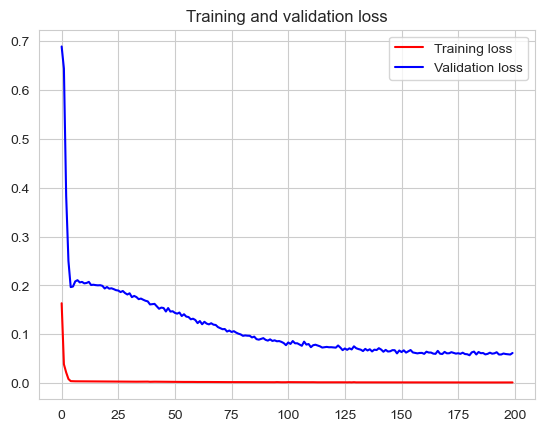

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

loss= history.history['loss']
val_loss=history.history['val_loss']

epochs=range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Predict and Evaluation

In [ ]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score, r2_score
from sklearn.metrics import mean_poisson_deviance, mean_gamma_deviance, accuracy_score
from sklearn.preprocessing import MinMaxScaler
import math

In [ ]:
### prediction and check performance.metrics

train_predict=lstm_model.predict(X_train)
test_predict=lstm_model.predict(X_test)

print("Train prediction shape:", train_predict.shape)
print("Test prediction shape:", test_predict.shape)

5/5 [==============================] - 0s 1ms/step
Train prediction shape: (464, 1)
Test prediction shape: (137, 1)


In [ ]:
# Transform back to original form
train_pred=Label_scaler.inverse_transform(train_predict)
test_pred=Label_scaler.inverse_transform(test_predict)

train_true=Label_scaler.inverse_transform(y_train.reshape(-1,1))
test_true=Label_scaler.inverse_transform(y_test.reshape(-1,1))

In [ ]:
# Evaluation metrics
# RMSE MSE MAE

# Evaluation metrices RMSE and MAE
print("Train data MSE: ", mean_squared_error(train_true,train_pred))
print("Train data MAE: ", mean_absolute_error(train_true,train_pred))
print("-------------------------------------------------------------------------------------")
print("Test data RMSE: ", math.sqrt(mean_squared_error(test_true,test_pred)))
print("Test data MSE: ", mean_squared_error(test_true,test_pred))
print("Test data MAE: ", mean_absolute_error(test_true,test_pred))
print("Test data MAPE: ", np.mean(np.abs(test_true-test_pred)/np.abs(test_true)))

Train data MSE:  76011.32869266717
Train data MAE:  205.19910560344832
-------------------------------------------------------------------------------------
Test data RMSE:  1072.9916522841988
Test data MSE:  1151311.0858715752
Test data MAE:  1018.3716332116785
Test data MAPE:  0.02741687717580704


In [ ]:
# R Square Score for Regression
print("Train data R2 score:", r2_score(train_true, train_pred))
print("Test data R2 score:", r2_score(test_true, test_pred))

Train data R2 score: 0.9795236544148372
Test data R2 score: -1.4104925475283707


### Plot

In [ ]:
# Plotting

import matplotlib.pyplot as plt
from itertools import cycle
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# comparison of the true close price and predicted close price
df_close=combine_data['Close'].to_numpy().reshape(-1,1)
look_back=timestep
trainPredictPlot=np.empty_like(df_close)
trainPredictPlot[:,:]=np.nan
trainPredictPlot[look_back:len(train_pred)+look_back,:]=train_pred
print("Train predicted data:", trainPredictPlot.shape)

Train predicted data: (744, 1)


In [ ]:
# Shift test predictions for plotting

testPredictPlot=np.empty_like(df_close)
testPredictPlot[:,:]=np.nan
testPredictPlot[len(train_pred)+val_size+(look_back*2)+1:len(df_close)-1,:] = test_pred
print("Test predicted data: ", testPredictPlot.shape)

Test predicted data:  (744, 1)


In [ ]:
names = cycle(['Original close price','Train predicted close price','Test predicted close price'])

plotdf = pd.DataFrame({'date': combine_data.index,
                       'original_close': combine_data['Close'],
                      'train_predicted_close': trainPredictPlot.reshape(1,-1)[0].tolist(),
                      'test_predicted_close': testPredictPlot.reshape(1,-1)[0].tolist()})

fig = px.line(plotdf,
              x=plotdf['date'],
              y=[plotdf['original_close'],plotdf['train_predicted_close'],                       plotdf['test_predicted_close']],
              labels={'value':'Close price','date': 'Open time'})
fig.update_layout(title_text='Comparision between original close price vs predicted close price',
                  plot_bgcolor='white',
                  font_size=15,
                  font_color='black',
                  legend_title_text='Close Price',
                  width=800,
                  height=600,)
fig.for_each_trace(lambda t:  t.update(name = next(names)))

fig.update_xaxes(showgrid=False)
fig.update_yaxes(showgrid=False)
fig.show()